# imports

In [1]:
from pyulog import ULog
import pandas as pd
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


# gathering data from .ulg

In [2]:
DATA_DIR = "data/1/"

In [3]:
from pyulog import ULog
import pandas as pd

ulog = ULog("data/1/ulg.ulg")
for d in ulog.data_list:
    df = pd.DataFrame(d.data)
    print(d.name)


actuator_armed
actuator_motors
actuator_outputs
battery_status
config_overrides
control_allocator_status
cpuload
distance_sensor_mode_change_request
ekf2_timestamps
esc_status
estimator_aid_src_baro_hgt
estimator_aid_src_fake_hgt
estimator_aid_src_fake_pos
estimator_aid_src_gnss_hgt
estimator_aid_src_gnss_pos
estimator_aid_src_gnss_vel
estimator_aid_src_gravity
estimator_aid_src_mag
estimator_baro_bias
estimator_event_flags
estimator_gps_status
estimator_innovation_test_ratios
estimator_innovation_variances
estimator_innovations
estimator_sensor_bias
estimator_states
estimator_status
estimator_status_flags
event
failsafe_flags
failure_detector_status
gripper
home_position
hover_thrust_estimate
landing_gear
manual_control_setpoint
mission_result
navigator_mission_item
navigator_status
parameter_update
position_setpoint_triplet
rate_ctrl_status
rtl_status
rtl_time_estimate
sensor_accel
sensor_baro
sensor_combined
sensor_gps
sensor_gyro
sensor_gyro_fft
sensor_mag
sensor_selection
sensors_

In [4]:
ulog_path = os.path.join(DATA_DIR, "ulg.ulg")
ulog = ULog(ulog_path)

MONITOR_CSV = [
    "vehicle_attitude",
    "sensor_accel_0.csv",
    "sensor_gyro_0.csv",
    "sensor_mag_0.csv",
    "sensor_baro_0.csv",
    "sensor_gps_0.csv",
    "vehicle_local_position_0.csv",
    "vehicle_global_position_0.csv"
]


for data in ulog.data_list:
    if data.name in MONITOR_CSV:
        df = pd.DataFrame(data.data)

        # Convert PX4 timestamp to seconds
        if "timestamp" in df.columns:
            df["timestamp_s"] = df["timestamp"] * 1e-6

        filename = f"{data.name}_{data.multi_id}.csv"
        filepath = os.path.join(DATA_DIR, "csv", filename)
        df.to_csv(filepath, index=False)
        print(f"Saved {filename}")


Saved vehicle_attitude_0.csv


 # transcribing to csv and into np array

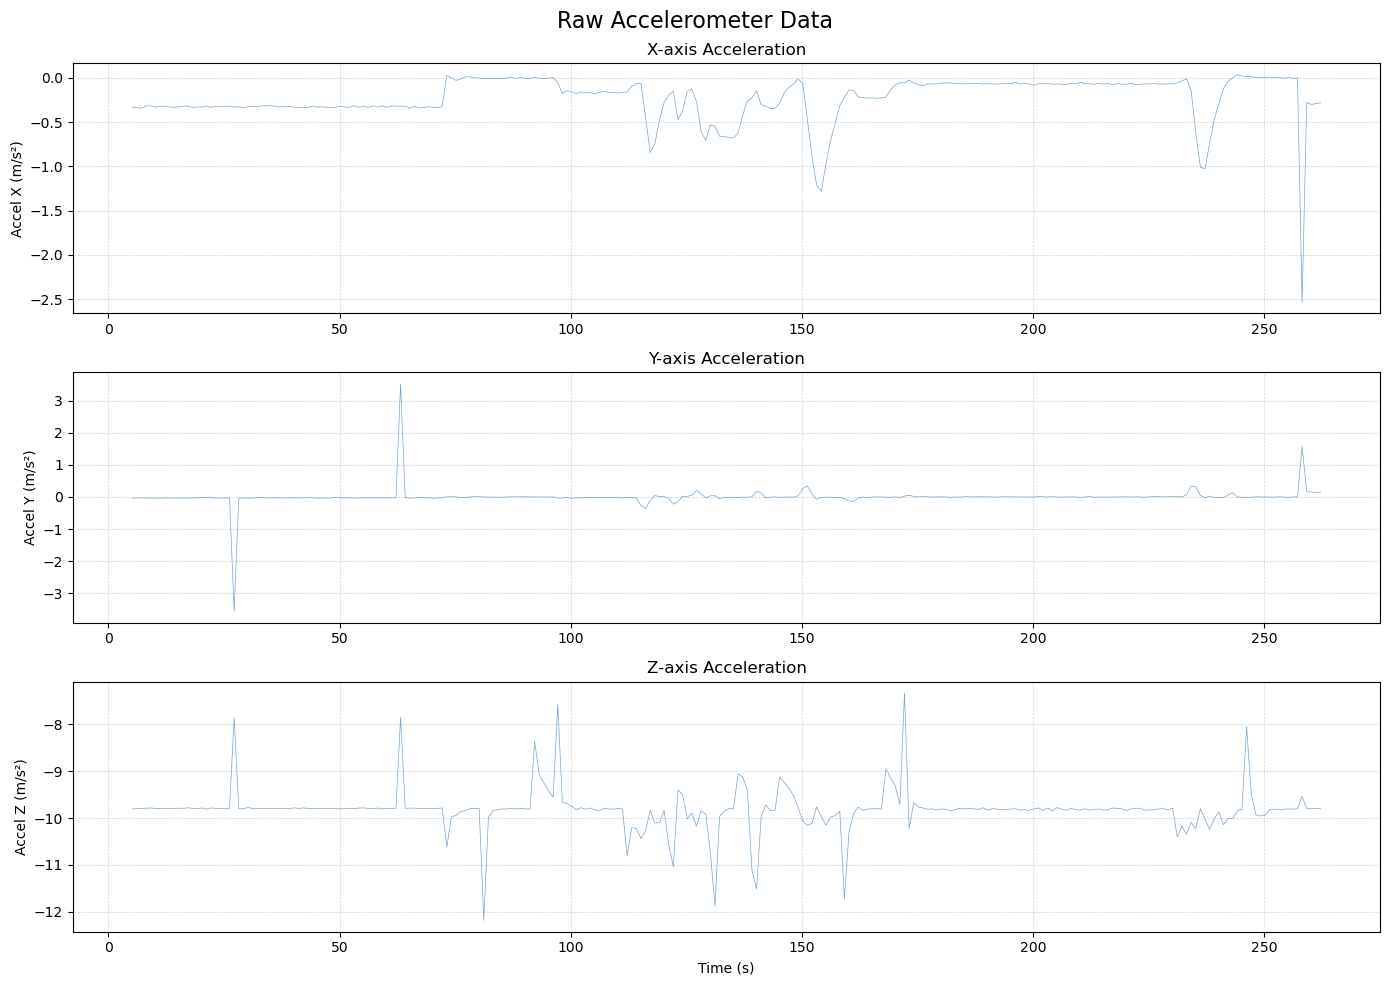

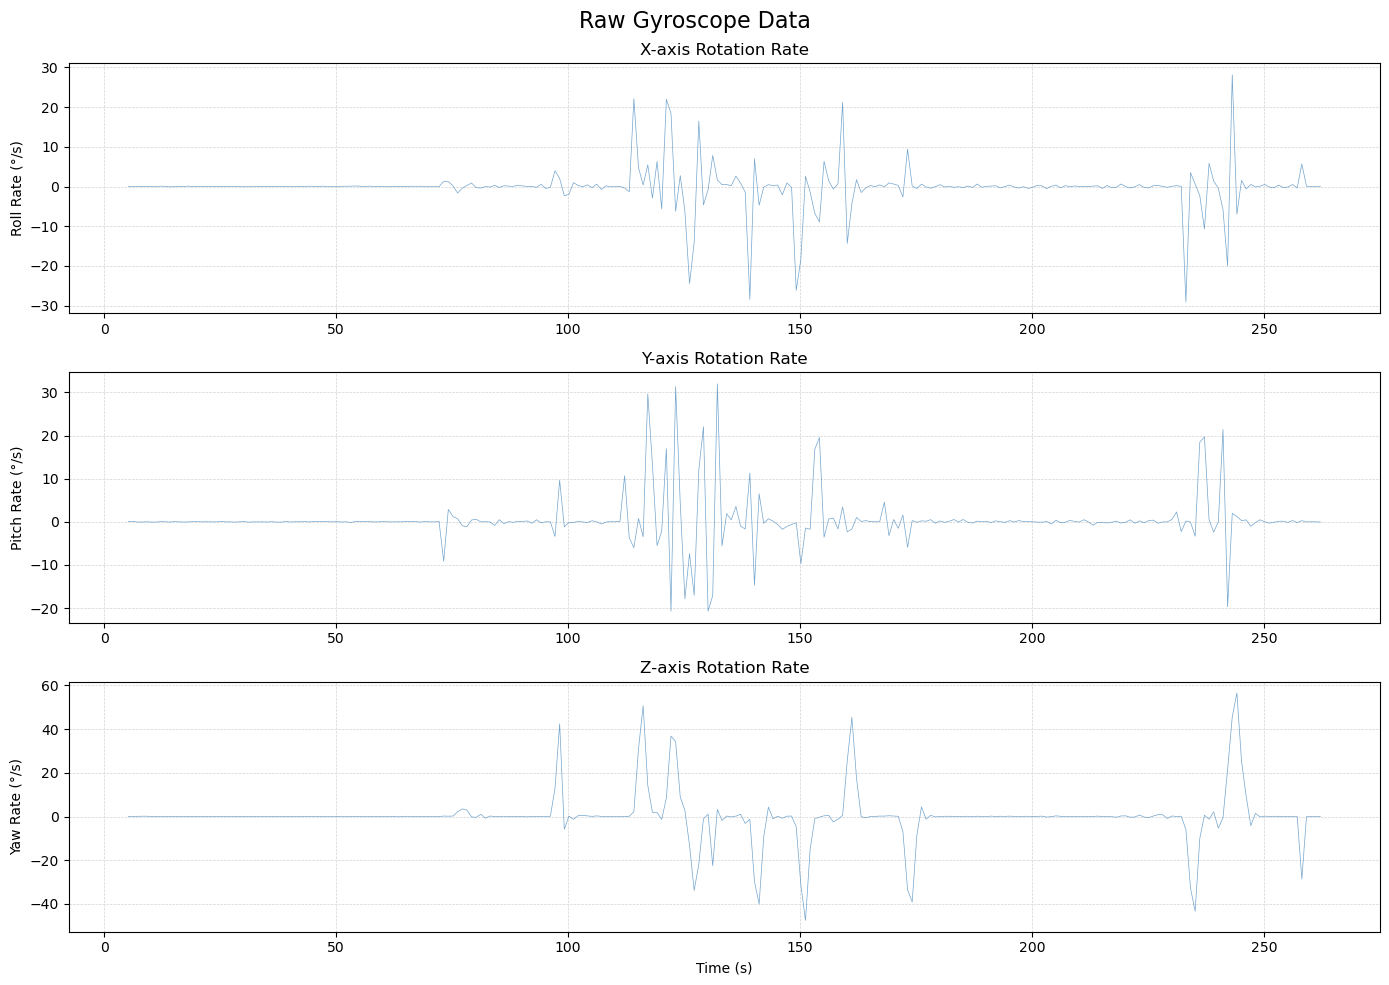

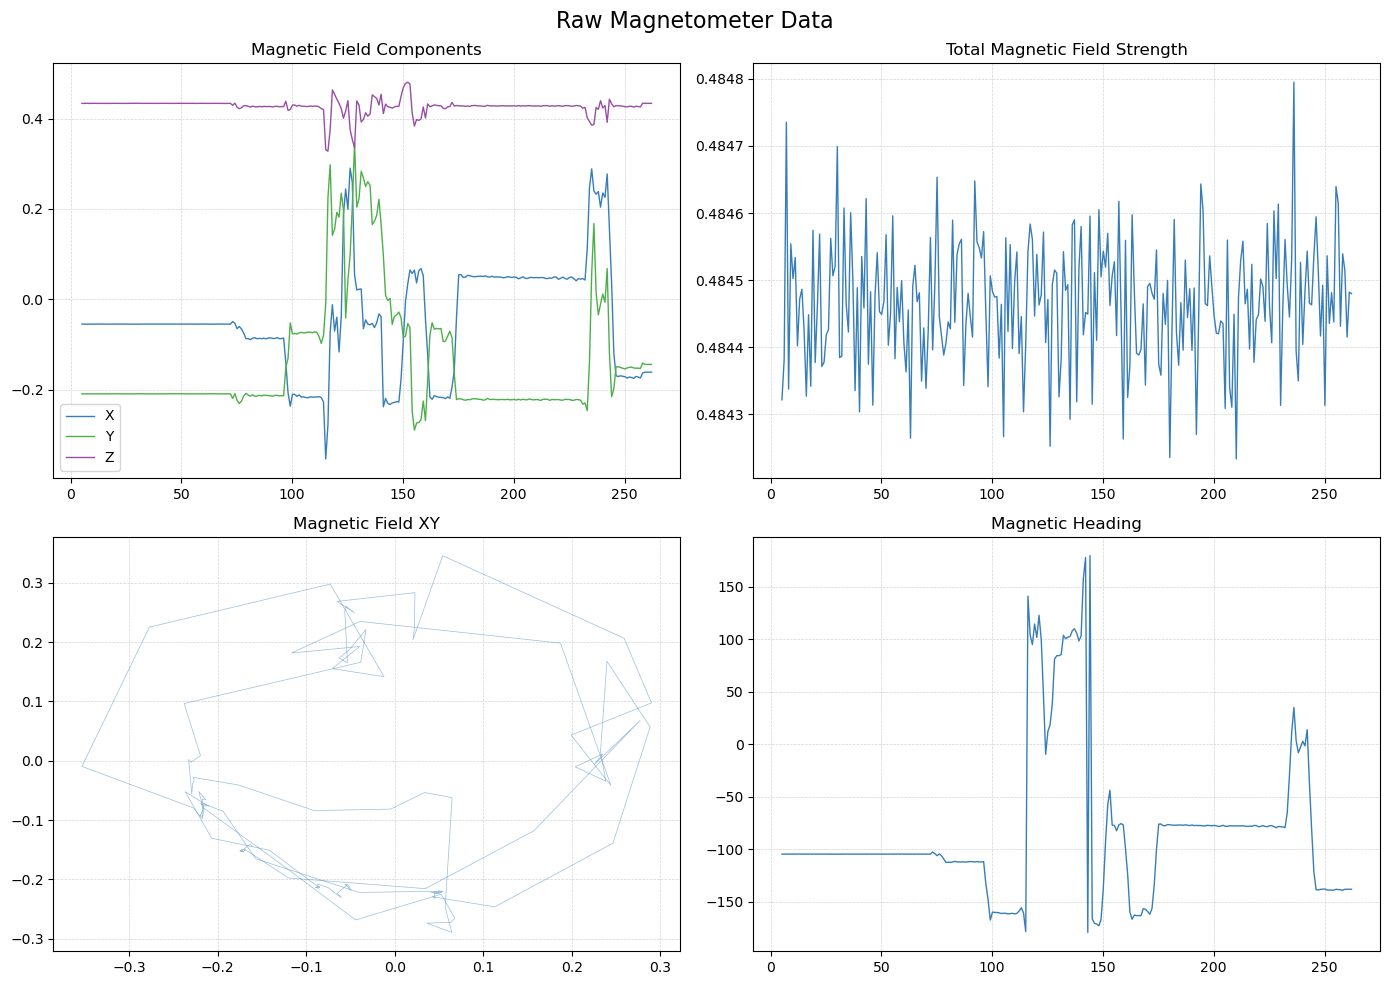

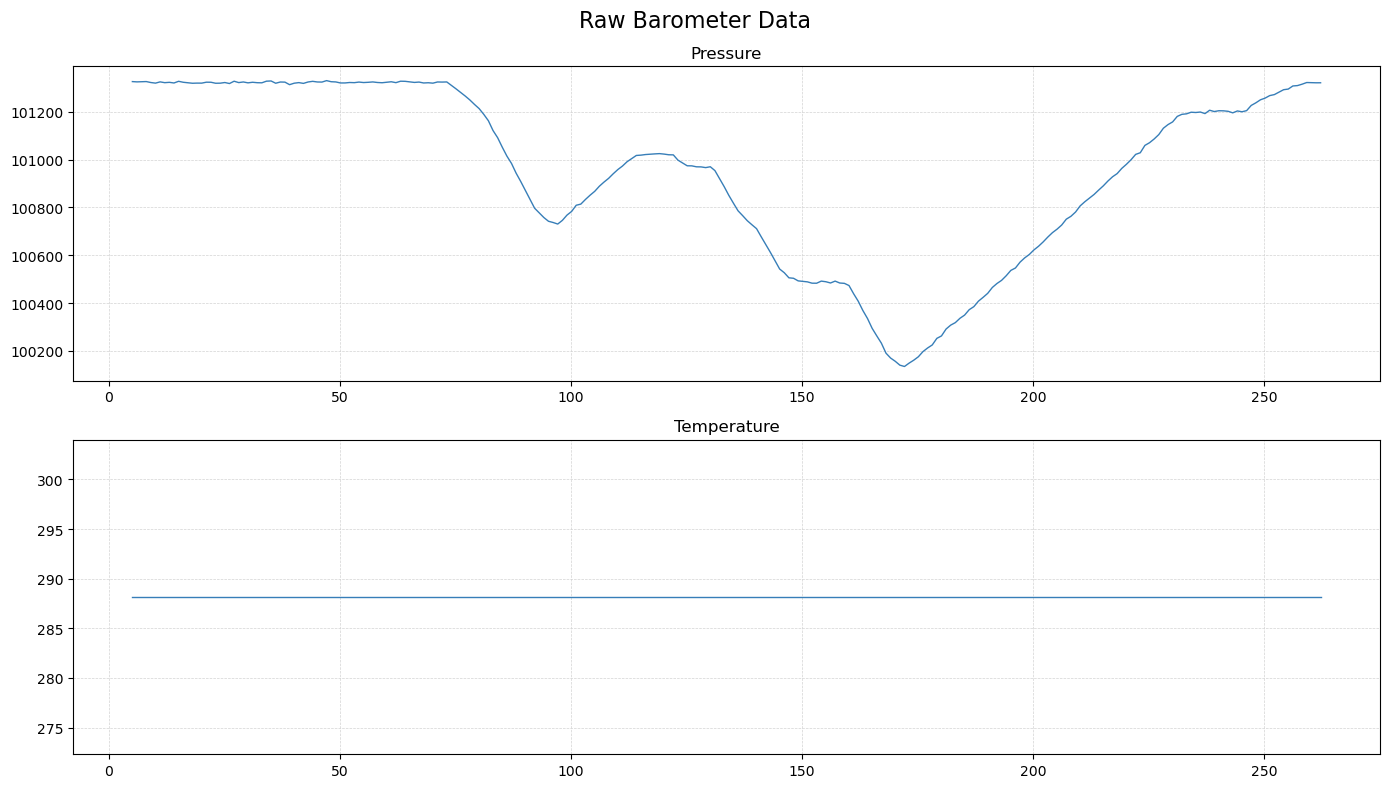

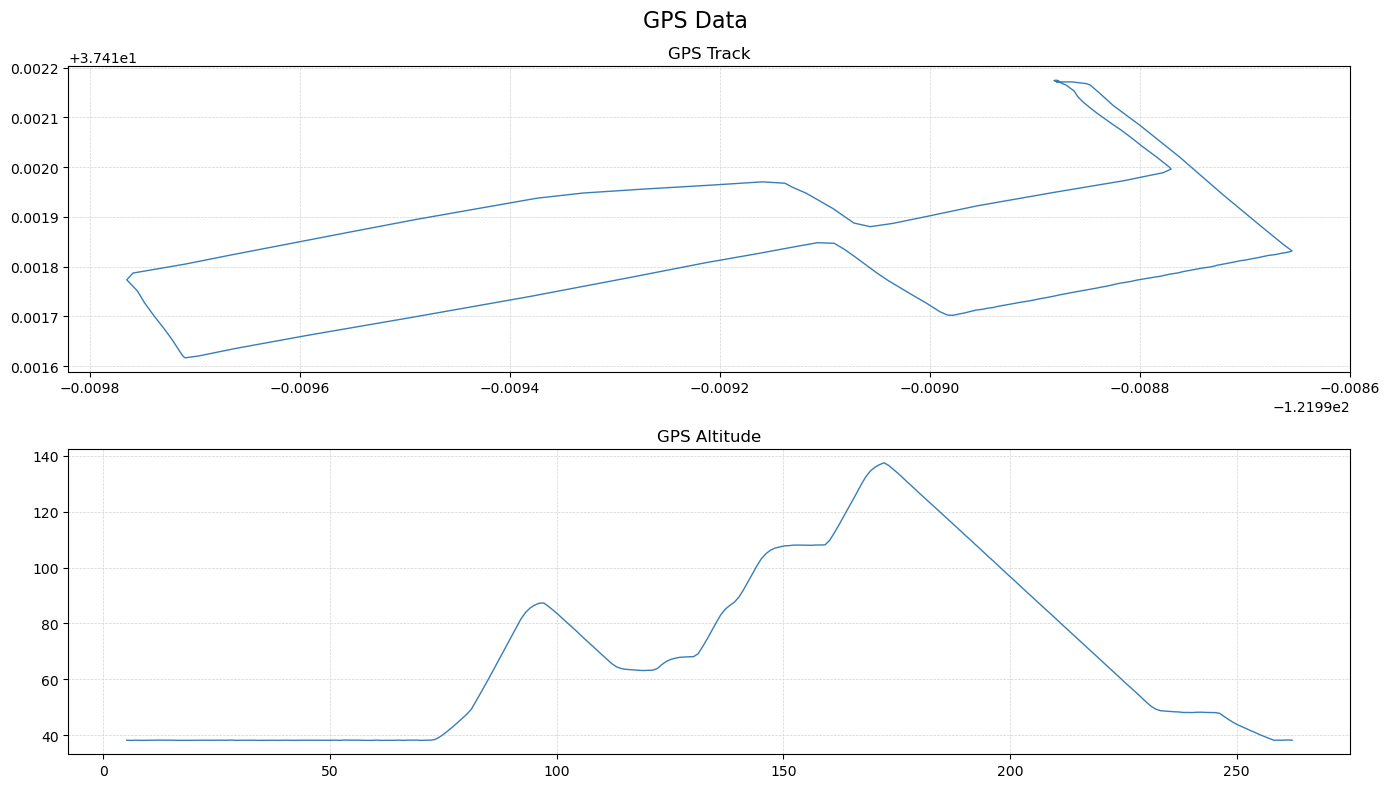

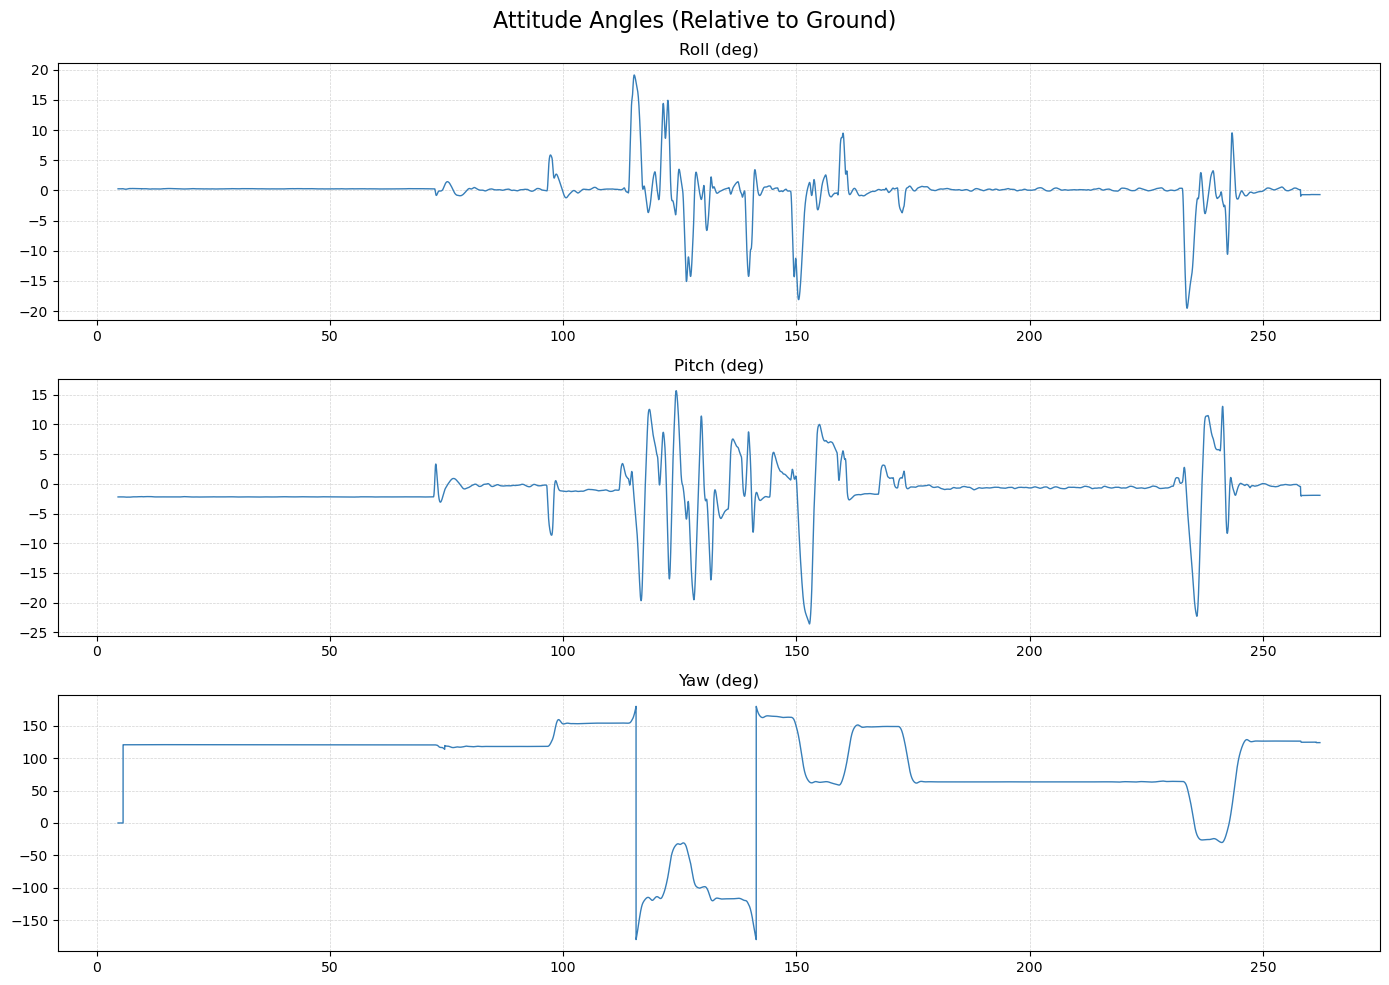

In [5]:
from utilities.plt import PX4CSVPlotter

plotter = PX4CSVPlotter("data/1/csv")

all_data = plotter.plot_all(plot=True)
angles = all_data["att"]
gps = all_data["gps"]

# Getting video and converting it to np.array and making it smaller

In [6]:
video_path = os.path.join(DATA_DIR, "mp4.mp4")
output_path = os.path.join(DATA_DIR, "output.mp4")

In [7]:
SAVE_EVERY_N = 1
PLOT_EVERY_N = 10

In [8]:
import cv2
import numpy as np
from tqdm import tqdm

cap = cv2.VideoCapture(video_path)
frames = []
frame_idx = 0

# Get total frames for tqdm progress
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

with tqdm(total=total_frames, desc="Reading frames") as pbar:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_idx % SAVE_EVERY_N == 0:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame_rgb)

        frame_idx += 1
        pbar.update(1)

cap.release()

frames = np.array(frames)
print("Frames shape:", frames.shape)


Reading frames: 100%|██████████| 5969/5969 [00:55<00:00, 107.37it/s]


Frames shape: (5969, 960, 1280, 3)


# cutting video to have only moving part

In [9]:
# import cv2
# import numpy as np
# from tqdm import tqdm
#
#
# cap = cv2.VideoCapture(video_path)
#
# total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# fps = cap.get(cv2.CAP_PROP_FPS)
# width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#
# # Function to compute frame difference
# def frame_diff(f1, f2):
#     diff = cv2.absdiff(f1, f2)
#     return np.mean(diff)
#
# # Read first frame
# ret, prev_frame = cap.read()
# if not ret:
#     raise ValueError("Cannot read video")
#
# prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
#
# first_change = None
# last_change = None
#
# with tqdm(total=total_frames-1, desc="Analyzing frames") as pbar:
#     for i in range(1, total_frames):
#         ret, frame = cap.read()
#         if not ret:
#             break
#
#         gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         diff = frame_diff(gray, prev_gray)
#
#         # Threshold to detect change (adjust if needed)
#         if diff > 1.0:
#             if first_change is None:
#                 first_change = i
#             last_change = i
#
#         prev_gray = gray
#         pbar.update(1)
#
# cap.release()
#
# print("First change frame:", first_change)
# print("Last change frame:", last_change)
#
# # If nothing changed, stop
# if first_change is None:
#     print("No movement detected.")
#     exit()
#
# # --- Trim video ---
# cap = cv2.VideoCapture(video_path)
# fourcc = cv2.VideoWriter_fourcc(*"mp4v")
# out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
#
# cap.set(cv2.CAP_PROP_POS_FRAMES, first_change)
#
# for i in tqdm(range(first_change, last_change + 1), desc="Writing trimmed video"):
#     ret, frame = cap.read()
#     if not ret:
#         break
#     out.write(frame)
#
# cap.release()
# out.release()
#
# print("Trimmed video saved to:", output_path)


In [10]:
# for i in range(0, len(frames), PLOT_EVERY_N):
#     plt.figure(figsize=(8, 4))
#     plt.imshow(frames[i])
#     plt.title(f"Saved Frame {i * SAVE_EVERY_N}")
#     plt.axis("off")
#     plt.show()

In [11]:
VIDEO_FPS = 12.95

len(frames)# Normalizing and Interpolizing

In [12]:
gps_time, gps_lon, gps_lat, gps_alt = gps
gps_alt = np.array(gps_alt)
gps_alt.shape

(258,)

In [14]:
import numpy as np

M = len(frames)     # 5969
N = M // 2

idx = np.linspace(0, M-1, N).astype(int)

frames_resampled = frames[idx]
print(frames_resampled.shape)  # (258, 960, 1280, 3)


(2984, 960, 1280, 3)


In [15]:
yaw_att  = np.array(angles[0])
pitch_att = np.array(angles[1])
roll_att   = np.array(angles[2])
time_att  = np.array(angles[3])

# --- NORMALIZE ---
roll_norm  = (roll_att + 180) % 360 - 180
pitch_norm = (pitch_att + 180) % 360 - 180
yaw_norm   = (yaw_att + 180) % 360 - 180

print(yaw_att.shape)   # -> same as gps_alt
print(pitch_att.shape) # -> same as gps_alt
print(roll_att.shape)
print(gps_time.shape)

(64409,)
(64409,)
(64409,)
(258,)


In [16]:
import numpy as np


M = len(yaw_norm)  # 64409

idx = np.linspace(0, M-1, N).astype(int)

gps_time = np.arange(N)
yaw_norm   = yaw_norm[idx]
pitch_norm = pitch_norm[idx]
roll_norm  = roll_norm[idx]

print(yaw_norm.shape)   # (258,)
print(pitch_norm.shape) # (258,)
print(roll_norm.shape)  # (258,)


(2984,)
(2984,)
(2984,)


In [17]:
old_len = len(gps_alt)

# Old and new index axes
x_old = np.linspace(0, 1, old_len)
x_new = np.linspace(0, 1, N)

gps_alt = np.interp(x_new, x_old, gps_alt)

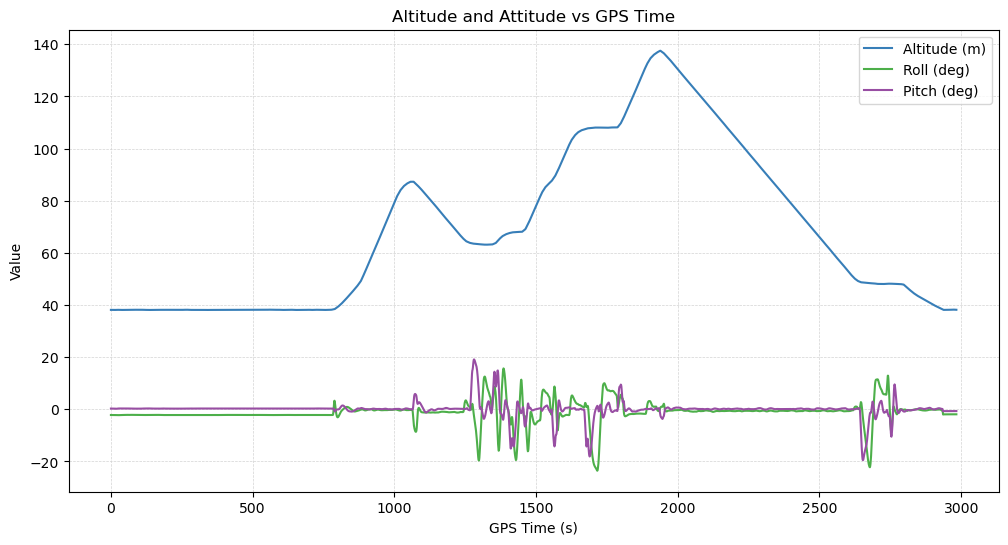

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(gps_time, gps_alt, label="Altitude (m)")
plt.plot(gps_time, roll_norm, label="Roll (deg)")
plt.plot(gps_time, pitch_norm, label="Pitch (deg)")


plt.title("Altitude and Attitude vs GPS Time")
plt.xlabel("GPS Time (s)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [19]:


frames_gps = frames


debug video

In [20]:
import time
import cv2

start_idx = 1000
offset = 550
fps = 30
T = 1 / fps

for i in range(start_idx, N):
    frame = frames_resampled[i].copy()
    frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    # Offset handling
    info_idx = i + offset
    info_idx = max(0, min(info_idx, N - 1))

    text = (
        f"Frame: {i} | "
        f"InfoIdx: {info_idx} | "
        f"Alt: {gps_alt[info_idx]:.2f} m  "
        f"Yaw: {yaw_norm[info_idx]:.2f}  "
        f"Pitch: {pitch_norm[info_idx]:.2f}  "
        f"Roll: {roll_norm[info_idx]:.2f}"
    )

    cv2.putText(
        frame_bgr,
        text,
        (20, 40),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.8,
        (0, 255, 0),
        2
    )

    cv2.imshow("Debug Video", frame_bgr)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    time.sleep(T)

cv2.destroyAllWindows()


# Stablizacja (słabo działa)

In [21]:
def perspective_stabilize(frame, roll, pitch, height, focal_length=30):
    if frame is None:
        return None  # prevent crash

    h, w = frame.shape[:2]
    cx, cy = w / 2, h / 2

    roll_rad = np.deg2rad(roll)
    pitch_rad = np.deg2rad(pitch)

    R_roll = np.array([
        [np.cos(roll_rad), -np.sin(roll_rad), 0],
        [np.sin(roll_rad),  np.cos(roll_rad), 0],
        [0,                 0,                1]
    ])

    R_pitch = np.array([
        [1, 0,                 0],
        [0, np.cos(pitch_rad), -np.sin(pitch_rad)],
        [0, np.sin(pitch_rad),  np.cos(pitch_rad)]
    ])

    R = R_roll @ R_pitch

    pts_src_3d = np.array([
        [-cx, -cy, height],
        [ w-cx, -cy, height],
        [ w-cx,  h-cy, height],
        [-cx,  h-cy, height]
    ], dtype=np.float32)

    pts_rot = (R @ pts_src_3d.T).T

    pts_dst = np.zeros((4, 2), dtype=np.float32)
    for i in range(4):
        X, Y, Z = pts_rot[i]
        pts_dst[i, 0] = (X * focal_length / Z) + cx
        pts_dst[i, 1] = (Y * focal_length / Z) + cy

    pts_src = np.array([
        [0, 0],
        [w, 0],
        [w, h],
        [0, h]
    ], dtype=np.float32)

    H, _ = cv2.findHomography(pts_src, pts_dst)
    stabilized = cv2.warpPerspective(frame, H, (w, h))

    return stabilized


In [22]:
stabilized_frames = []

for i in range(len(frames_gps)):
    if frames[i] is None:
        continue

    st = perspective_stabilize(frames_gps[i], roll_interp[i], pitch_interp[i], height_interp[i])
    if st is None:
        continue

    stabilized_frames.append(st)

stabilized_frames = np.array(stabilized_frames, dtype=np.uint8)


NameError: name 'roll_interp' is not defined

In [ ]:
for i in range(0, len(frames_gps), 3):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].imshow(frames_gps[i])
    axs[0].set_title(f"Original Frame {i}")
    axs[0].axis("off")

    axs[1].imshow(stabilized_frames[i])
    axs[1].set_title(f"Stabilized Frame {i}")
    axs[1].axis("off")

    plt.tight_layout()
    plt.show()

    print(f"Frame {i} → height: {height_interp[i]:.2f} m | roll: {roll_interp[i]:.2f}° | pitch: {pitch_interp[i]:.2f}° | yaw: {yaw_interp[i]:.2f}°")


# Usunięcie ekstremum kątów


In [ ]:
roll_deg  = np.degrees(roll_interp)
pitch_deg = np.degrees(pitch_interp)

print("roll degrees range:", np.min(roll_deg), np.max(roll_deg))


In [ ]:
MAX_ANGLE = 20  # degrees

good_frames = []
good_indices = []

for i, frame in enumerate(frames):
    if abs(roll_deg[i]) < MAX_ANGLE and abs(pitch_deg[i]) < MAX_ANGLE:
        good_frames.append(frame)
        good_indices.append(i)

good_frames = np.array(good_frames)

print("Kept frames:", len(good_frames))
print("Dropped frames:", len(frames) - len(good_frames))


In [ ]:
for i in range(0, len(good_frames), ):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].imshow(frames[i])
    axes[0].set_title(f"Original Frame {i * SAVE_EVERY_N}")
    axes[0].axis("off")

    axes[1].imshow(good_frames[i])
    axes[1].set_title(f"Stabilized Frame {i * SAVE_EVERY_N}")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()
